In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
l1 = np.linspace(-10, 10, 100)
sin_l1 = np.sin(l1)
sin_l1

Text(0, 0.5, 'sin(x)')

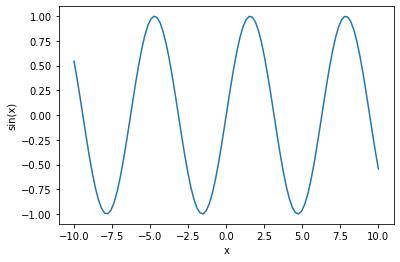

In [45]:
fig, ax = plt.subplots()
ax.plot(l1, sin_l1)
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")

In [41]:
# Understanding the derivative of a point in the graph

def func(x):
  return np.sin(x)

h = 0.001

x1 = 3.5
x2 = -4.7225
x3 = -6
print((func(x1+h)-func(x1))/h)
print((func(x2+h)-func(x2))/h)
print((func(x3+h)-func(x3))/h)

-0.9362811396153581
0.009610871251175546
0.9600304188848718


In [49]:
# partial derivatives of mathematical operations
h = 0.001

a = 2
b = 3
c = 6
d1 = a*b+c

# derivative of d1 a with respect to a 
a+=h
d2 = a*b+c
print(f"d1: {d1}")
print(f"d2: {d2}")
print(f"derivative: {(d2-d1)/h}")

d1: 12
d2: 12.003
derivative: 3.0000000000001137


In [183]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._parents:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._operation:
            dot.node(name=str(id(n)) + n._operation, label=n._operation)
            dot.edge(str(id(n)) + n._operation, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._operation)
    
    return dot

In [256]:
class Value:
  def __init__(self, data, _parents=(), _operation='', label=''):
    assert isinstance(data, int) or isinstance(data, float), "Number must either be integer, float or Value object"
    
    self.data = data
    self._parents = set(_parents)
    self._operation = _operation
    self.label = label
    self._backward = lambda: None
    self.grad = 0.0
  
  def __add__(self, addend):
    res = Value(self.data + addend.data, (self, addend), '+')
    def _backward():
      # derivative of a + b wrt a is 1. So chain rule reduces to 1 * res.grad
      self.grad += res.grad
      addend.grad += res.grad
    res._backward = _backward
    return res
  
  def __radd__(self, addend):
    res = Value(addend.data + self.data, (self, addend), '+')
    def _backward():
      self.grad += res.grad
      addend.grad += res.grad
    res._backward = _backward
    return res
  
  def __mul__(self, multiplier):
    res = Value(self.data * multiplier.data, (self, multiplier), '*')
    def _backward():
      # derivative of a*b is b so chain rule reduces to b.data * res.grad
      self.grad += multiplier.data * res.grad
      multiplier.grad += self.data * res.grad
    res._backward = _backward
    return res

  def __rmul__(self, multiplier):
    res = Value(multiplier.data * self.data, (self, multiplier), '*')
    def _backward():
      self.grad += multiplier.data * res.grad
      multiplier.grad = self.data * res.grad
    self._backward = _backward
    return res

  def __truediv__(self, divider):
    return Value(self.data / divider.data)

  def __repr__(self):
    return f"Value(data={self.data})"


In [257]:
def delta():
  h = 0.001

  a = Value(2, label='a')
  b = Value(-4, label='b')
  c = Value(6, label='c')
  d = a * b; d.label='d'
  e = d+c; e.label='e'
  f = Value(4, label='f')
  out1 =  e * f; out1.label = 'out1' 


  a = Value(2, label='a')
  b = Value(-4, label='b')
  c = Value(6, label='c')
  d = a * b; d.label='d'
  e = d+c; e.label='e'
  f = Value(4, label='f')
  out2 =  e * f; out2.label = 'out2'
  out2.data += h

  print((out2.data-out1.data)/h)

delta()

1.000000000000334


In [258]:
a = Value(2, label='a')
b = Value(-4, label='b')
c = Value(6, label='c')
d = a * b; d.label='d'
e = d+c; e.label='e'
f = Value(4, label='f')
g =  e * f; g.label = 'g' 

In [259]:
g.grad = 1.0

In [260]:
g._backward()

In [239]:
for pr in g._parents:
  print(pr)

Value(data=-2)
Value(data=4)


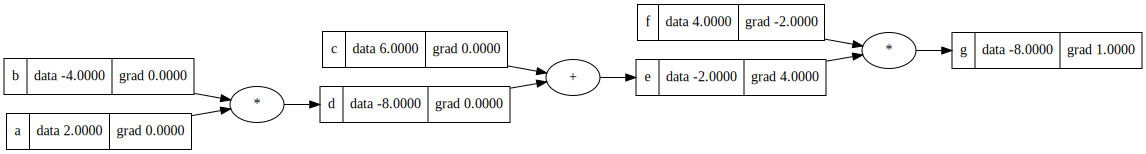

In [261]:
draw_dot(g)

In [262]:
e._backward()

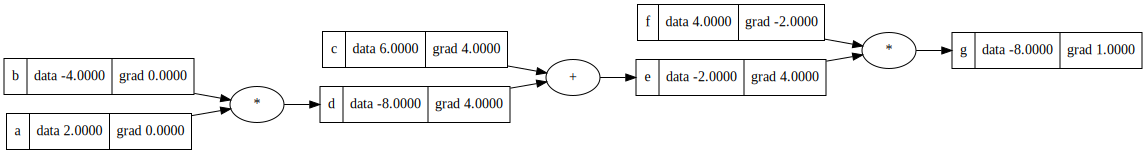

In [263]:
draw_dot(g)

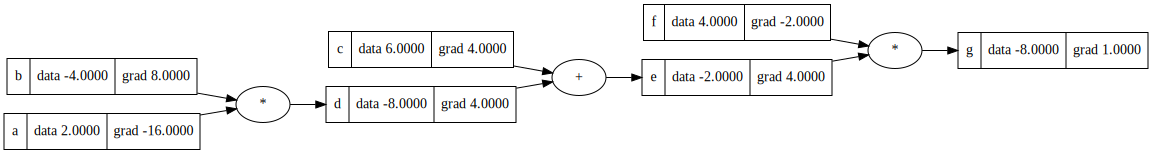

In [264]:
d._backward()
draw_dot(g)